## PADL Practical: Word2vec embeddings

In [77]:
# Demonstrating word2vec on toy data
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/ivanbar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Toy datasets
sentences0 = [
    "My husky bit me",
    "My husky pulls the sleigh",
    "My dog bit the postman",
    "I ate a pizza with olives",
    "I ate a sandwich with cheese",
    "You ate a hotdog with ketchup",
    "You ate a toast with cheese",
    "A husky is a type of dog",
    "What dog breed is your favourite? Mine is the husky.",
]

sentences1 = [
    "You know Dasher and Dancer and Prancer and Vixen Comet and Cupid and Donner and Blitzen, but do you recall the most famous reindeer of all?",
    "Rudolph the Red-Nosed Reindeer Had a very shiny nose And if you ever saw it, You would even say it glows.",
    "All of the other reindeer Used to laugh and call him names, They never let poor Rudolph Join in any reindeer games.",
    "Then one foggy Christmas Eve Santa came to say: Rudolph, with your nose so bright Will you not guide my sleigh tonight?",
    "Then how the reindeer loved him, As they shouted out with glee: Rudolph the Red-Nosed Reindeer, You will go down in history!",
]


sentences2 = [
    "The itsy bitsy spider went up the water spout.",
    "Down came the rain, and washed the spider out.",
    "Out came the sun, and dried up all the rain.",
    "So, the itsy bitsy spider went up the spout again.",
    "The itsy bitsy spider went up the water spout.",
    "Down came the rain, and washed the spider out.",
    "Out came the sun, and dried up all the rain.",
    "So, the itsy bitsy spider went up the spout again.",
]

sentences3 = [
    "Huskies are known for their striking blue eyes.",
    "Dogs are loyal companions.",
    "Pizza is a popular food worldwide.",
    "Huskies have thick fur to keep them warm in cold climates.",
    "Dogs come in various shapes and sizes.",
    "Pizza toppings can range from savory to sweet.",
    "Huskies are energetic and playful.",
    "Dogs are often called 'man's best friend.'",
    "Pizza is often enjoyed with friends and family.",
    "Huskies are sled dogs bred for endurance.",
    "Dogs have an acute sense of smell.",
    "Pizza can be customized with endless combinations of ingredients.",
    "Huskies are independent thinkers.",
    "Dogs enjoy spending time outdoors.",
    "Pizza originated in Italy.",
    "Huskies are known for their distinctive howl.",
    "Dogs are used for various tasks such as herding and hunting.",
    "Pizza is often cooked in a wood-fired oven for authentic flavor.",
    "Huskies thrive in cold climates.",
    "Dogs require regular exercise to stay healthy.",
    "Pizza is a versatile dish that can be enjoyed for any meal.",
    "Huskies have a strong prey drive.",
    "Dogs provide companionship and emotional support.",
    "Pizza dough can be made with various types of flour.",
    "Huskies are known for their friendly demeanor.",
    "Dogs are highly trainable animals.",
    "Pizza is often topped with tomato sauce and cheese.",
    "Huskies are descendants of sled dogs used by the Chukchi people.",
    "Dogs are omnivores, but some breeds have specific dietary needs.",
    "Pizza can be enjoyed with a variety of beverages, including soda and beer.",
    "Huskies have a thick double coat to protect them from harsh weather.",
    "Dogs have been domesticated for thousands of years.",
    "Pizza delivery is a popular option for convenience.",
    "Huskies require regular grooming to maintain their coat.",
    "Dogs communicate through body language, barks, and whines.",
    "Pizza crust can be thin and crispy or thick and chewy.",
    "Huskies are intelligent and independent-minded.",
    "Dogs have been bred for specific purposes, such as herding, hunting, and companionship.",
    "Pizza can be topped with a variety of meats, vegetables, and even fruit.",
    "Huskies are known for their endurance and stamina.",
    "Dogs have a keen sense of hearing.",
    "Pizza is often associated with gatherings and parties.",
]

sentences = sentences0 + sentences3  # + sentences1 + sentences2

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Number of dimensions for the Word2vec embeddings
v_size = 200

# Window size for the Word2vec training
w_size = 2

# Train Word2Vec model (check the Gensim library for more information)
# https://radimrehurek.com/gensim/auto_examples/index.html
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=v_size,
    window=w_size,
    min_count=1,
    workers=4,
)

# Access embeddings: they are stored as KeyedVectors
word_embeddings = model.wv

**Produce the scatterplot of the first 2 components of the word2vec embeddings**

In [79]:
coordX = []
coordY = []
label = []
for key in word_embeddings.index_to_key:
    coordX.append(word_embeddings[key][0])
    coordY.append(word_embeddings[key][1])
    label.append(key)
    print(word_embeddings[key])

[-2.4232856e-04  1.3994718e-04  2.5013718e-03  4.6657221e-03
 -4.5513022e-03 -3.6004912e-03  3.3739335e-03  4.6527348e-03
 -2.5707972e-03 -1.7836422e-03  3.6391176e-03 -8.9678849e-04
 -2.2006945e-03  3.2746608e-03 -2.5528269e-03 -9.3020016e-04
  1.4072461e-03  5.2347273e-04 -4.1253045e-03 -4.8867599e-03
  3.7364999e-03  2.5475863e-03  3.4300049e-03  3.3464411e-04
  3.0943358e-03 -1.6924555e-03 -4.7886735e-04  2.7679589e-03
 -3.9064656e-03 -1.9042601e-03 -3.6791291e-03 -5.0268671e-04
  4.8557492e-03 -3.6519817e-03 -1.2350529e-03 -8.4436871e-04
  4.1193888e-03 -3.0076555e-03 -4.4672197e-05 -2.5717458e-03
 -4.8380536e-03  2.4987876e-03 -4.3966160e-03 -2.1896465e-03
  1.1958062e-04 -1.7883632e-04 -3.8262438e-03  4.6977047e-03
  2.6250142e-03  4.6161367e-03 -4.0557962e-03  2.1841268e-03
 -2.0613144e-03  3.6705789e-04  4.3149604e-03 -2.2398522e-03
  2.2381563e-03 -3.5563726e-03 -1.8955644e-03  4.6881316e-03
 -8.7991374e-04  1.2419390e-04 -2.0422272e-03 -3.8616266e-03
 -9.3254598e-04  1.25350

In [80]:
all_coords = np.array([word_embeddings[key] for key in word_embeddings.index_to_key])

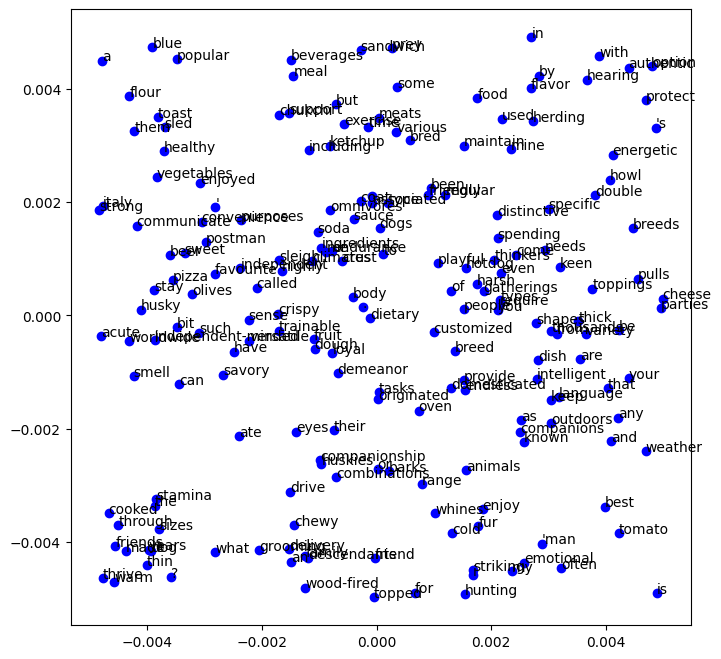

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(coordX, coordY, color="blue")

for i, txt in enumerate(label):
    ax.annotate(txt, (coordX[i], coordY[i]))

**Test if the Word2vec features are correlated or orthogonal to each other**

In [82]:
from scipy.stats import pearsonr

for i in range(4):
    for j in range(4):
        if i != j and i < j:
            print(
                f"Correlation between component {i} and component {j} is {pearsonr(all_coords[:, i], all_coords[:, j]).statistic}"
            )

            print(
                f"Dot product of component {i} and component {j} is {all_coords[:, i] @ all_coords[:, j]}"
            )

Correlation between component 0 and component 1 is 0.06039595455529988
Dot product of component 0 and component 1 is 9.07733483472839e-05
Correlation between component 0 and component 2 is -0.06469513019764853
Dot product of component 0 and component 2 is -0.00010395585559308529
Correlation between component 0 and component 3 is -0.05997079785289617
Dot product of component 0 and component 3 is -9.623218647902831e-05
Correlation between component 1 and component 2 is 0.06540919746779479
Dot product of component 1 and component 2 is 0.00010439578181831166
Correlation between component 1 and component 3 is -0.028852244351823833
Dot product of component 1 and component 3 is -4.881189306615852e-05
Correlation between component 2 and component 3 is -0.11403056613210669
Dot product of component 2 and component 3 is -0.00019737606635317206


**Apply PCA to the word embeddings, and plot the PC1 vs PC2 scatterplot (with words as labels).**




In [83]:
# Separate the words (as 'labels') from the embeddings (stored in X)
label = []
X = []
for i, key in enumerate(word_embeddings.index_to_key):
    label.append(key)
    X.append(word_embeddings[key])

np.reshape(X, (-1, v_size))

array([[-2.4232856e-04,  1.3994718e-04,  2.5013718e-03, ...,
        -1.2376317e-03, -4.7072065e-03,  2.2336256e-03],
       [ 5.2442003e-05,  1.5458994e-03, -3.4260091e-03, ...,
        -3.7325998e-03, -1.2451087e-03, -2.7739808e-03],
       [-3.5521616e-03,  6.2329212e-04, -3.6080305e-03, ...,
        -4.3482836e-03,  1.5001182e-03, -3.3509915e-03],
       ...,
       [-1.5083915e-03, -3.1151939e-03,  1.1500231e-03, ...,
         1.9039712e-03, -4.8804088e-03,  1.3829001e-03],
       [ 2.6996966e-04,  4.7098631e-03,  4.7772024e-03, ...,
        -2.3636897e-03, -4.0531815e-03,  4.7155544e-03],
       [-4.7792001e-03,  1.9231016e-03,  8.9010788e-04, ...,
        -1.5402447e-03,  4.2331177e-03,  3.0279488e-03]], dtype=float32)

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(X)
pca = PCA()
X_transformed = pca.fit_transform(X_scaled)
X_transformed

array([[-3.91939347e-01,  3.33050035e-01,  9.85872503e-01, ...,
         1.42938524e-02,  1.86950676e-02,  6.19977522e-16],
       [-3.73020501e-01,  8.53430845e-01,  2.20099742e+00, ...,
        -1.02878627e-03, -1.61764566e-02,  6.19977522e-16],
       [-8.39986891e-01,  5.58958224e+00,  9.70779566e-01, ...,
         2.11268536e-02, -3.01551351e-04,  6.19977522e-16],
       ...,
       [-3.01827132e-01, -2.15131198e-01,  2.80874321e-01, ...,
        -3.63107874e-03,  2.27104395e-02,  6.19977522e-16],
       [-1.86462608e+00,  1.48586856e+00, -3.83856408e+00, ...,
        -3.65930217e-03, -1.09606616e-02,  6.19977522e-16],
       [-2.26042185e+00,  2.57140081e+00, -1.69169905e-02, ...,
        -3.97099534e-03,  2.79936701e-02,  6.19977522e-16]])

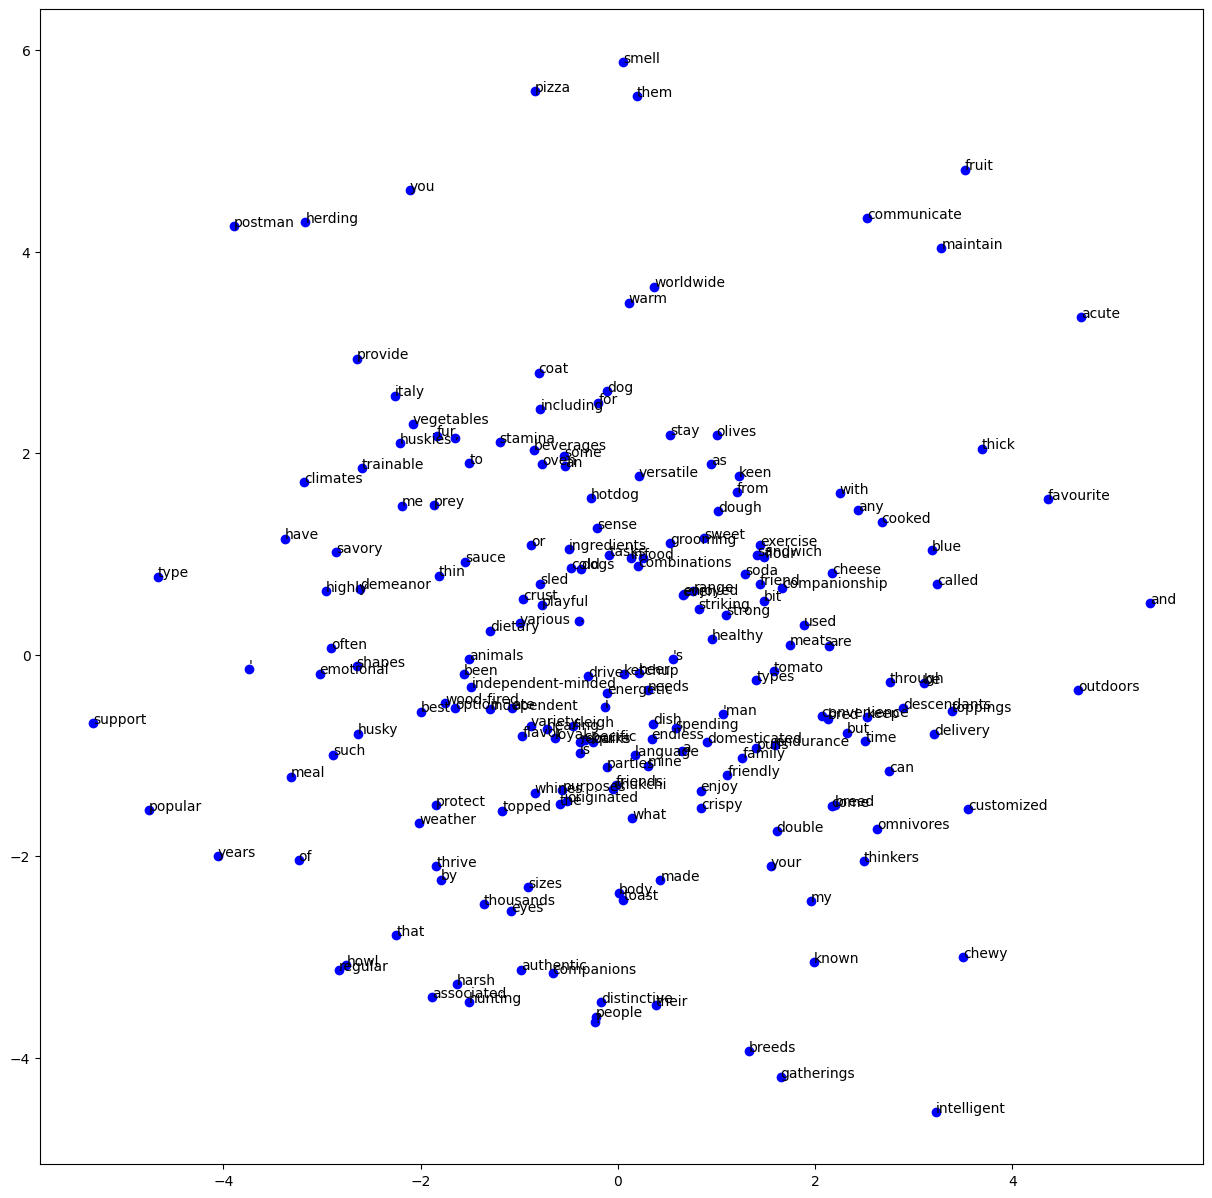

In [85]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], color="blue")

for i, txt in enumerate(label):
    ax.text(X_transformed[i, 0], X_transformed[i, 1], txt)

In [90]:
model.wv.most_similar("cheese")

TypeError: most_similar_to_given() missing 1 required positional argument: 'keys_list'

**Experiment** with (1) the choice of dataset (by adding and editing sentences), and with (2) different sizes for the word embedding vectors (vector_size) and (3) the window used to generate the embeddings, and study how they affect the PC scatterplot.



*   Can you find a setup that brings closer words that are close in meaning?
*   Can you find a setup that brings closer words with similar syntactic role, e.g. prepositions (on/at/under/near...)?

